# Section 1

In [1]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
coins = ("BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD")

train_start = "2023-08-01"
train_end = "2024-08-01"
test_start = "2024-08-01"
test_end = "2024-12-01"

start_date = "2023-08-01"
end_date = "2024-12-01"

In [4]:
def get_coins_data(coins, start, end):
    data = yf.download(coins, start=start, end=end, interval="1d")
    data = data.dropna()
    return data

In [5]:
data = get_coins_data(coins, start_date, end_date)
data

[*********************100%***********************]  4 of 4 completed


Price            Close                                             High  \
Ticker         BNB-USD       BTC-USD      ETH-USD   XRP-USD     BNB-USD   
Date                                                                      
2023-08-01  247.505020  29675.732422  1871.792114  0.707211  247.505020   
2023-08-02  240.494644  29151.958984  1839.089722  0.685195  248.511551   
2023-08-03  241.061523  29178.679688  1835.136475  0.664135  241.583252   
2023-08-04  241.476013  29074.091797  1827.712891  0.635539  243.155472   
2023-08-05  242.959351  29042.126953  1834.987915  0.628423  243.027725   
...                ...           ...          ...       ...         ...   
2024-11-26  613.587280  91985.320312  3326.517334  1.401323  645.292969   
2024-11-27  644.948486  95962.531250  3657.249268  1.472812  646.851807   
2024-11-28  654.361633  95652.468750  3579.811523  1.541343  663.021973   
2024-11-29  654.809753  97461.523438  3593.494385  1.796731  663.324707   
2024-11-30  654.329163  96449.054688  3705.705322  1.944121  676.924438   

Price                                                   Low                \
Ticker           BTC-USD      ETH-USD   XRP-USD     BNB-USD       BTC-USD   
Date                                                                        
2023-08-01  29675.732422  1873.029907  0.707211  238.530243  28657.023438   
2023-08-02  29987.998047  1877.511475  0.707087  236.891769  28946.509766   
2023-08-03  29375.707031  1856.407593  0.686761  238.509644  28959.488281   
2023-08-04  29302.078125  1847.912231  0.666442  240.452286  28885.335938   
2023-08-05  29102.464844  1836.464844  0.635532  240.090393  28957.796875   
...                  ...          ...       ...         ...           ...   
2024-11-26  94991.750000  3461.292969  1.456542  600.991272  90770.812500   
2024-11-27  97361.179688  3687.009033  1.518370  608.621460  91778.664062   
2024-11-28  96650.203125  3664.878174  1.542370  641.617065  94677.351562   
2024-11-29  98693.171875  3647.264404  1.811531  649.163208  95407.882812   
2024-11-30  97499.343750  3739.934814  1.954907  648.892395  96144.218750   

Price                                    Open                             \
Ticker          ETH-USD   XRP-USD     BNB-USD       BTC-USD      ETH-USD   
Date                                                                       
2023-08-01  1817.920776  0.683532  241.128052  29230.873047  1856.190186   
2023-08-02  1822.348267  0.680232  247.490311  29704.146484  1873.468140   
2023-08-03  1825.347778  0.658851  240.509979  29161.812500  1838.897949   
2023-08-04  1817.413818  0.630304  241.042862  29174.382812  1834.890503   
2023-08-05  1824.807983  0.612637  241.489670  29075.388672  1827.798584   
...                 ...       ...         ...           ...          ...   
2024-11-26  3255.542969  1.294805  636.639709  93087.281250  3412.950928   
2024-11-27  3303.567871  1.357346  613.587280  91978.140625  3326.029053   
2024-11-28  3531.870605  1.434183  644.948486  95954.945312  3656.609619   
2024-11-29  3538.446777  1.527908  654.361755  95653.953125  3579.910645   
2024-11-30  3572.254150  1.770554  654.809753  97468.812500  3593.598145   

Price                     Volume                                         
Ticker       XRP-USD     BNB-USD      BTC-USD      ETH-USD      XRP-USD  
Date                                                                     
2023-08-01  0.698503   830645013  18272392391   7634860636   1438067858  
2023-08-02  0.707087   650256385  19212655598   6448512422   1132335650  
2023-08-03  0.685180   400525696  12780357746   4710581074   1414576525  
2023-08-04  0.664088   370373499  12036639988   4861242484   1342066974  
2023-08-05  0.635532   300760369   6598366353   2866049749   1142144189  
...              ...         ...          ...          ...          ...  
2024-11-26  1.415367  2637257322  91656519855  39902959158   9378581138  
2024-11-27  1.401312  2393610865  71133452438  43383987191   7766

In [6]:
train_data = data.loc[train_start:train_end].Close
test_data = data.loc[test_start:test_end].Close

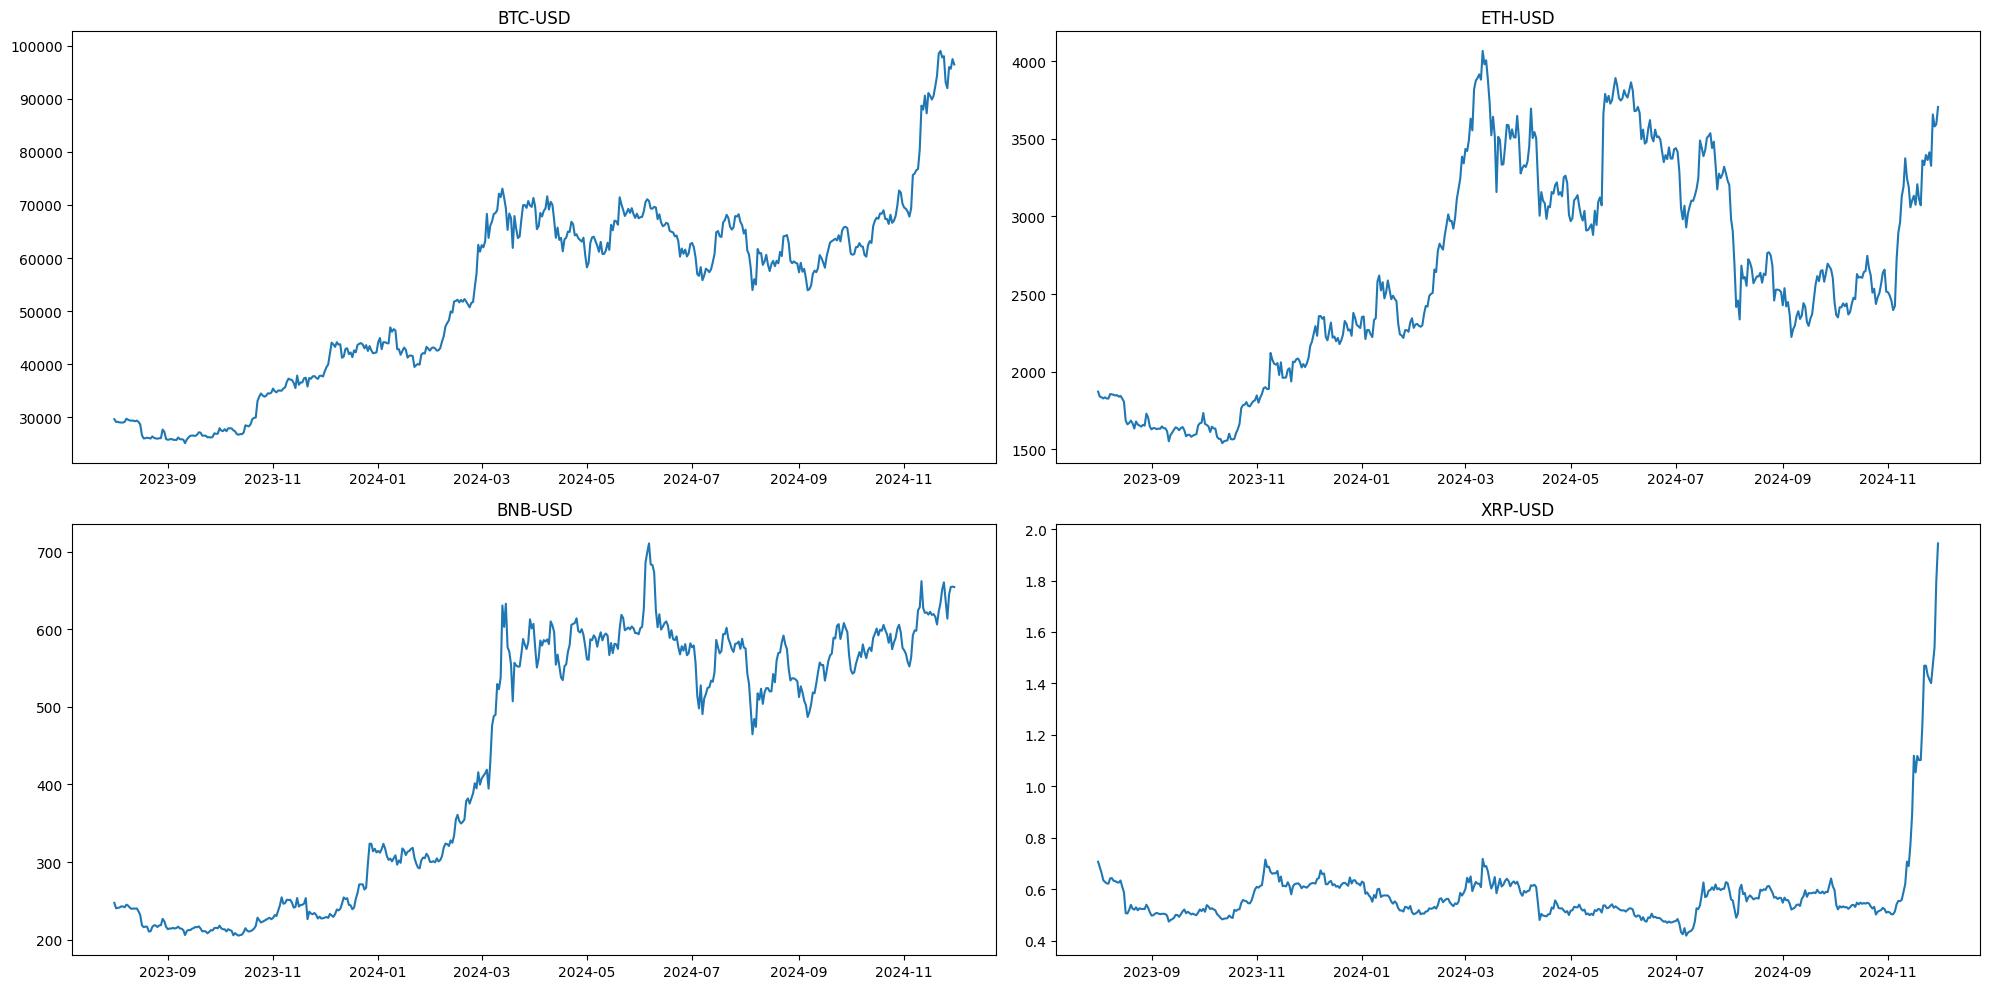

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes[0, 0].plot(data["Close"]["BTC-USD"])
axes[0, 0].set_title("BTC-USD")

axes[0, 1].plot(data["Close"]["ETH-USD"])
axes[0, 1].set_title("ETH-USD")

axes[1, 0].plot(data["Close"]["BNB-USD"])
axes[1, 0].set_title("BNB-USD")

axes[1, 1].plot(data["Close"]["XRP-USD"])
axes[1, 1].set_title("XRP-USD")

fig.tight_layout()
plt.show()

# Section 2

## Part 1

In [8]:
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statistics import mean
from arch import arch_model

In [9]:
def mean_forecast(model_type, returns: pd.Series, window):
    volatilities = []
    data = returns.copy(deep=True).to_list()

    for i in range(window):
        model = arch_model(data, vol=model_type, p=1, q=1, rescale=True)
        model_fit = model.fit(disp="off", show_warning=False)
        forecast = model_fit.forecast(horizon=1)
        forecast = np.sqrt(forecast.variance.values[-1, :][0])
        volatilities.append(forecast)
        data.append(forecast)

    return mean(volatilities), volatilities

In [10]:
returns = 100 * train_data.pct_change().dropna()
windows = [7, 30]
columns = pd.MultiIndex.from_tuples(
    [(coin, window) for coin, window in list(itertools.product(coins, windows))]
)
indexes = ["Garch", "EGarch", "FIGarch"]
volatilities = pd.DataFrame(index=indexes, columns=columns)
predicted_volatilities = {7: {}, 30: {}}

for coin, window in list(itertools.product(coins, windows)):

    garch_vol_mean, garch_vol = mean_forecast("GARCH", returns[coin], window)
    egarch_vol_mean, egarch_vol = mean_forecast("EGARCH", returns[coin], window)
    figarch_vol_mean, figarch_vol = mean_forecast("FIGARCH", returns[coin], window)
    volatilities.loc["Garch", (coin, window)] = garch_vol_mean
    volatilities.loc["EGarch", (coin, window)] = egarch_vol_mean
    volatilities.loc["FIGarch", (coin, window)] = figarch_vol_mean
    predicted_volatilities[window][coin] = {
        "garch": garch_vol,
        "egarch": egarch_vol,
        "figarch": figarch_vol,
    }

In [11]:
volatilities

BTC-USD              ETH-USD             BNB-USD            \
               7         30         7         30        7         30   
Garch    2.350822  2.358935   3.413278  3.399992  2.210343  2.432097   
EGarch   2.528368  2.668457  23.445509  9.461795  2.520949  3.431927   
FIGarch   2.43328  2.424001   2.872986  2.868511  2.581769  2.819749   

          XRP-USD            
               7         30  
Garch    3.172131  3.227249  
EGarch    3.41076  3.252874  
FIGarch  3.806327  3.521968

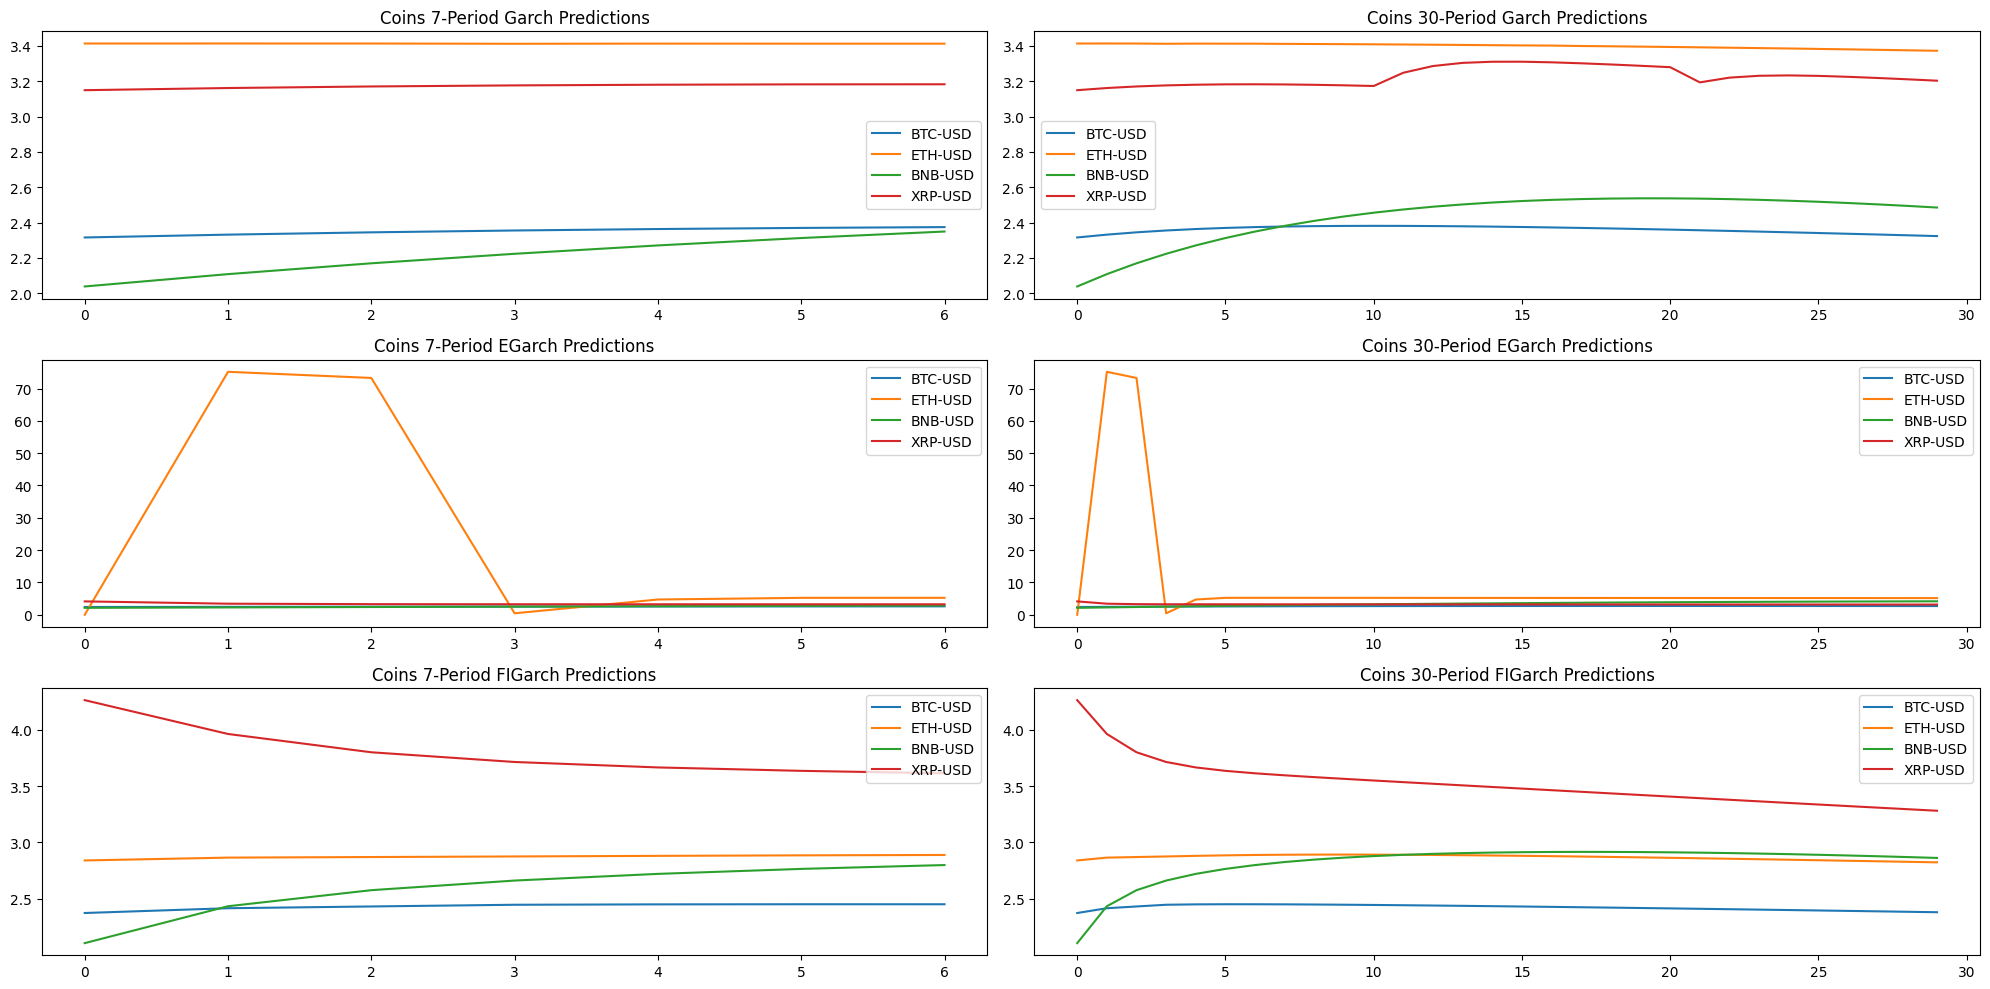

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

for coin in coins:
    axes[0, 0].plot(predicted_volatilities[7][coin]["garch"], label=f"{coin}")
    axes[0, 0].set_title("Coins 7-Period Garch Predictions")
    axes[0, 0].legend()

    axes[0, 1].plot(predicted_volatilities[30][coin]["garch"], label=f"{coin}")
    axes[0, 1].set_title("Coins 30-Period Garch Predictions")
    axes[0, 1].legend()

    axes[1, 0].plot(predicted_volatilities[7][coin]["egarch"], label=f"{coin}")
    axes[1, 0].set_title("Coins 7-Period EGarch Predictions")
    axes[1, 0].legend()

    axes[1, 1].plot(predicted_volatilities[30][coin]["egarch"], label=f"{coin}")
    axes[1, 1].set_title("Coins 30-Period EGarch Predictions")
    axes[1, 1].legend()

    axes[2, 0].plot(predicted_volatilities[7][coin]["figarch"], label=f"{coin}")
    axes[2, 0].set_title("Coins 7-Period FIGarch Predictions")
    axes[2, 0].legend()

    axes[2, 1].plot(predicted_volatilities[30][coin]["figarch"], label=f"{coin}")
    axes[2, 1].set_title("Coins 30-Period FIGarch Predictions")
    axes[2, 1].legend()

fig.tight_layout()
plt.show()

## Part 2 (Proxies)

### Historical Volatility

In [13]:
def calculate_historical_volatility(df, window):
    returns = df['Close'].pct_change()

    mean_returns = returns.rolling(window=window).mean()
    squared_deviations = (returns - mean_returns) ** 2
    rolling_sum = squared_deviations.rolling(window=window).sum()
    volatility = np.sqrt(rolling_sum / (window - 1))

    return volatility.dropna()

### Parkinson volatility

In [14]:
def calculate_parkinson_volatility(df, window):
    log_range_squared = np.log(df['High'] / df['Low']) ** 2
    rolling_sum = log_range_squared.rolling(window=window).sum()
    ln_factor = 4 * window * np.log(2)
    parkinson_volatility = np.sqrt(rolling_sum / ln_factor)

    return parkinson_volatility.dropna()


### Garman-Klass volatility

In [15]:
def calculate_garman_klass_volatility(df, window):
    high_low_term = np.log(df['High'] / df['Low']) ** 2
    close_open_term = np.log(df['Close'] / df['Open']) ** 2

    first_sum = high_low_term.rolling(window=window).sum() / (2 * window)
    second_sum = close_open_term.rolling(window=window).sum() * (2 * np.log(2) - 1) / window

    volatility = np.sqrt(first_sum - second_sum)

    return volatility.dropna()

### Yang-Zhang volatility

In [16]:
def calculate_yang_zhang_volatility(df, window, alpha=2.0):
    overnight_return = np.log(df['Open'] / df['Close'].shift(1))

    open_to_close_return = np.log(df['Close'] / df['Open'])

    rs_volatility = np.log(df['High'] / df['Low'])

    avg_overnight_return = overnight_return.rolling(window=window).mean()
    avg_open_to_close_return = open_to_close_return.rolling(window=window).mean()

    sigma_o_squared = ((overnight_return - avg_overnight_return) ** 2).rolling(window=window).mean()
    sigma_c_squared = ((open_to_close_return - avg_open_to_close_return) ** 2).rolling(window=window).mean()

    sigma_rs_squared = (rs_volatility ** 2).rolling(window=window).mean()

    k = (alpha - 1) / (alpha + (window + 1) / (window - 1))

    yang_zhang_volatility = np.sqrt(sigma_o_squared + k * sigma_c_squared + (1 - k) * sigma_rs_squared)

    return yang_zhang_volatility.dropna()

In [17]:
train_data = data.loc[train_start:train_end]
proxies = {}

In [18]:
historical_7 = calculate_historical_volatility(train_data, window=7)
proxies["historical_7"] = historical_7

historical_30 = calculate_historical_volatility(train_data, window=30)
proxies["historical_30"] = historical_30

In [19]:
parkinson_7 = calculate_parkinson_volatility(train_data, window=7)
proxies["parkinson_7"] = parkinson_7

parkinson_30 = calculate_parkinson_volatility(train_data, window=30)
proxies["parkinson_30"] = parkinson_30

In [20]:
garman_klass_7 = calculate_garman_klass_volatility(train_data, window=7)
proxies["garman_klass_7"] = garman_klass_7

garman_klass_30 = calculate_garman_klass_volatility(train_data, window=30)
proxies["garman_klass_30"] = garman_klass_30

In [21]:
yang_zhang_7 = calculate_yang_zhang_volatility(train_data, window=7)
proxies["yang_zhang_7"] = yang_zhang_7

yang_zhang_30 = calculate_yang_zhang_volatility(train_data, window=30)
proxies["yang_zhang_30"] = yang_zhang_30

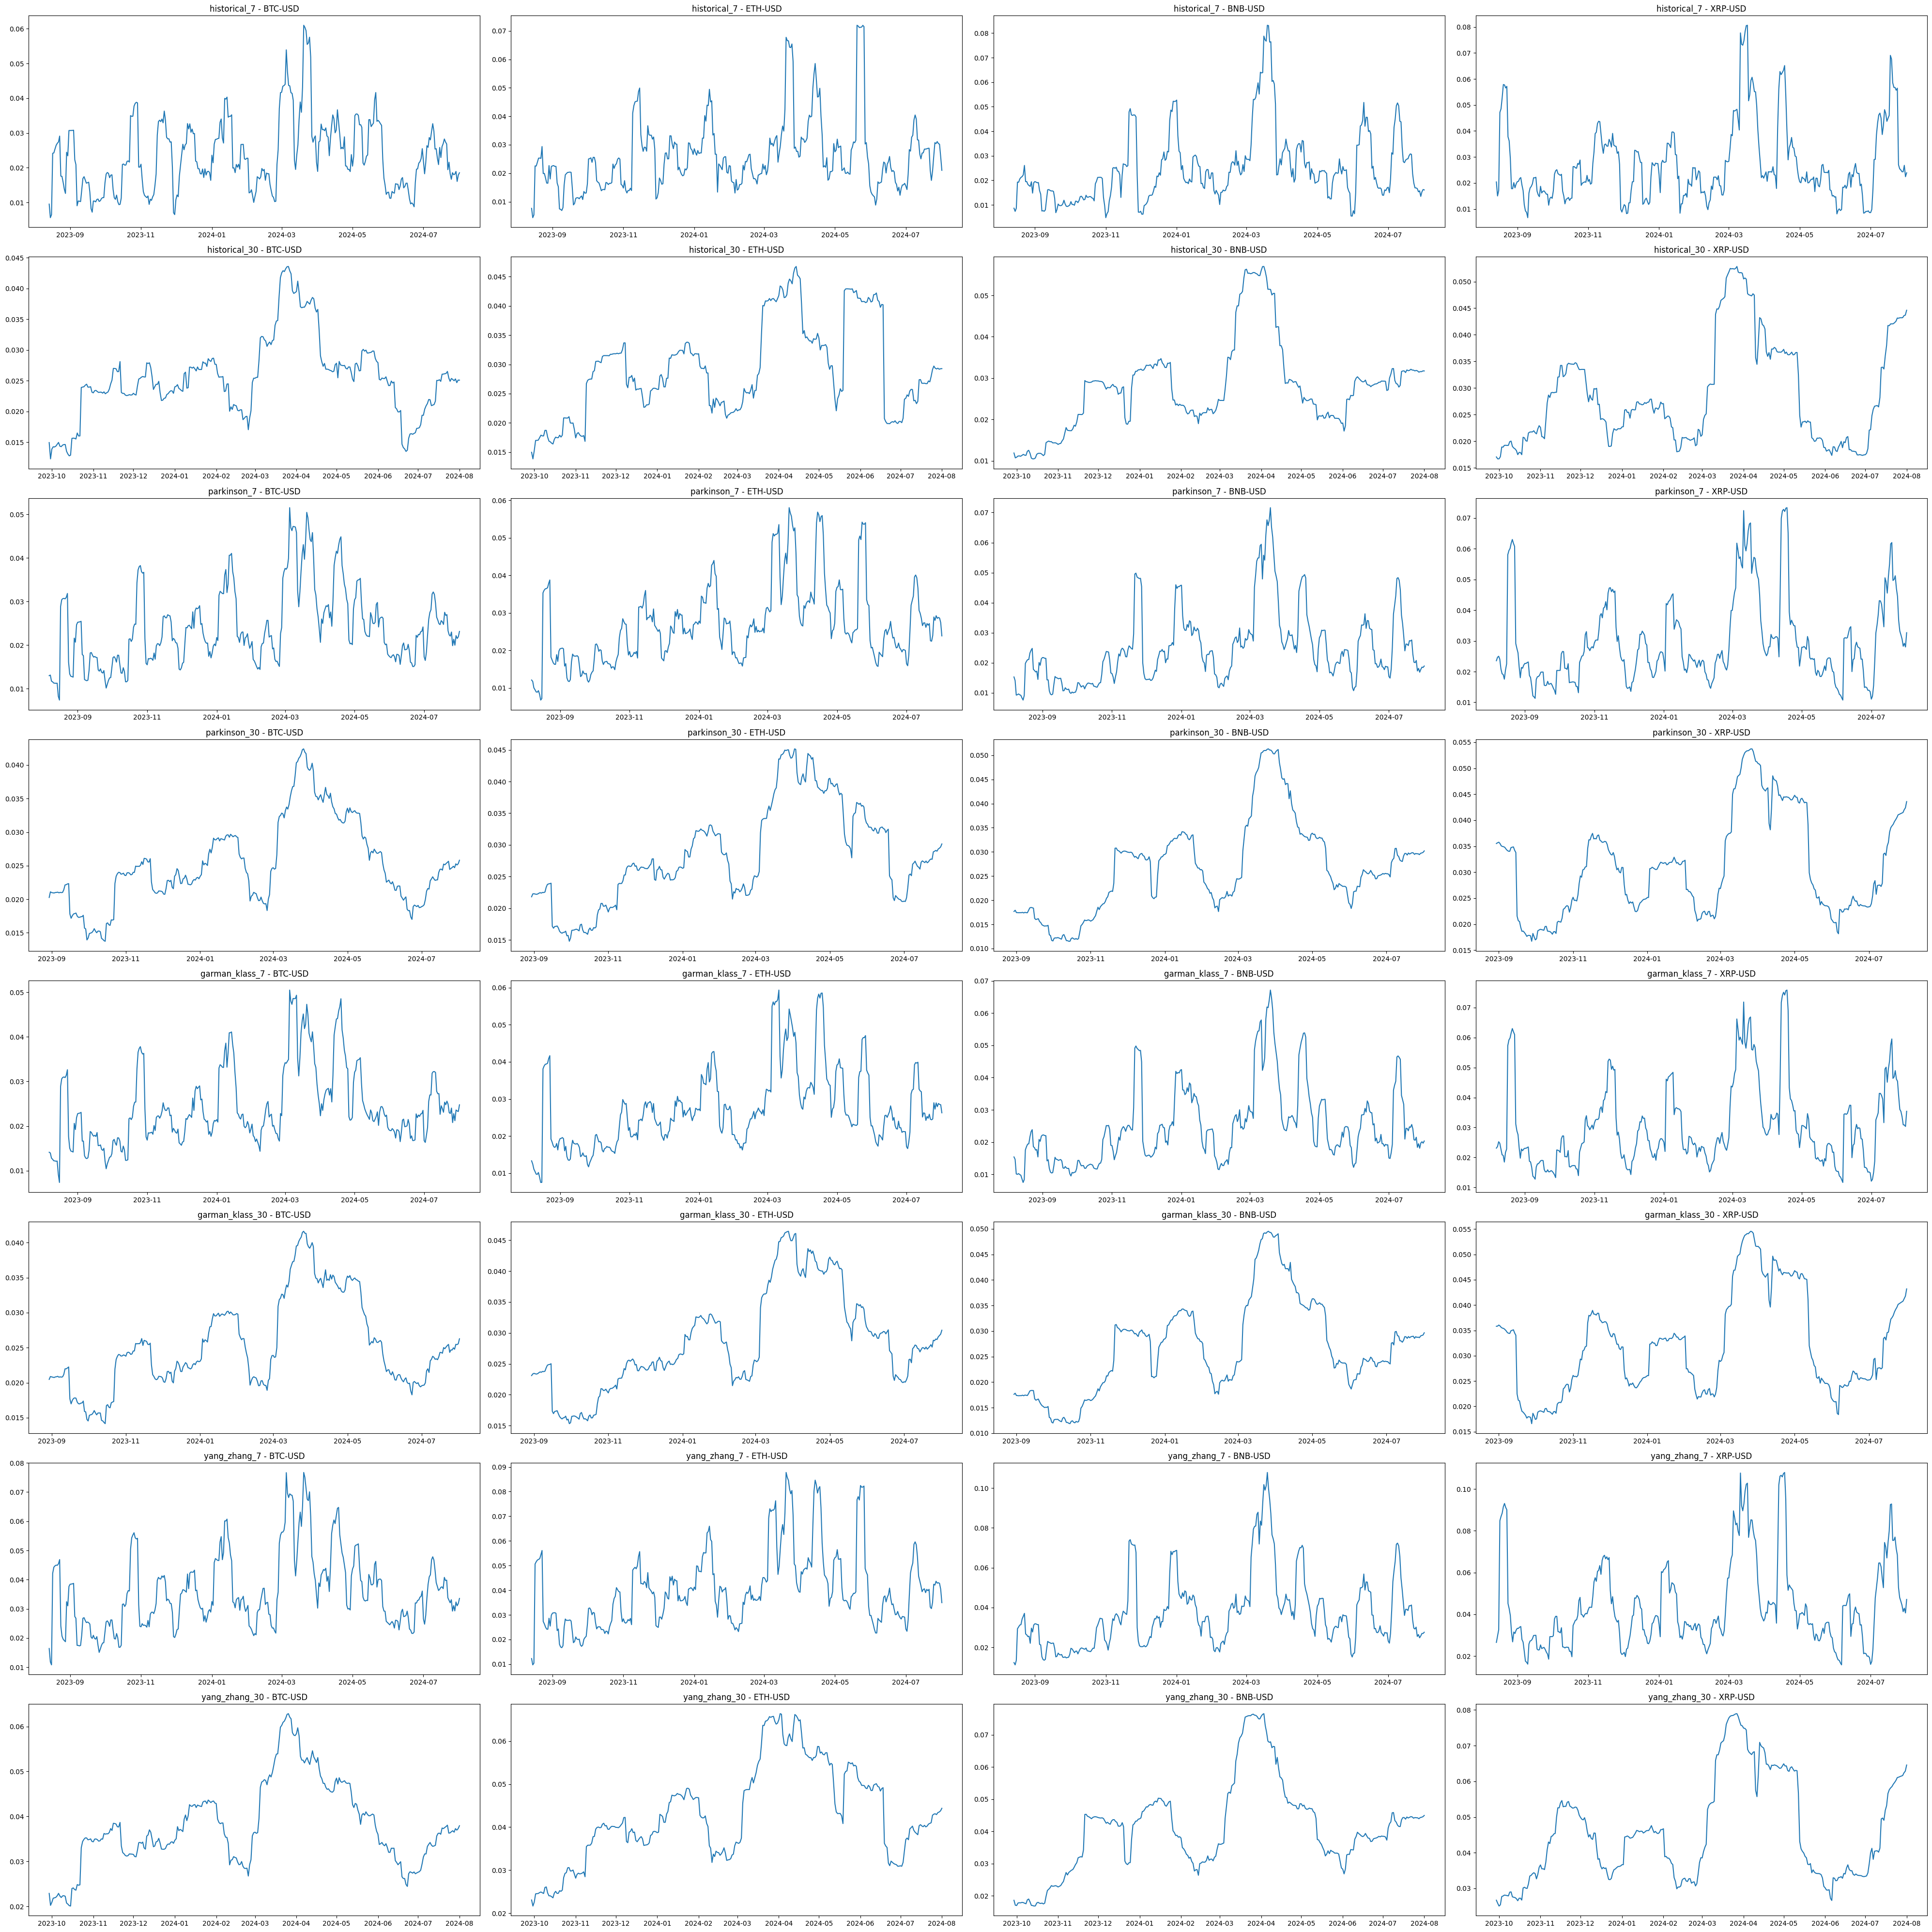

In [22]:
rows = len(proxies)
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 10, rows * 5))

for i, (proxy_name, proxy_data) in enumerate(proxies.items()):
    for j, coin in enumerate(coins):
      ax = axes[i, j] if rows > 1 else axes[j]
      ax.plot(proxy_data[coin])
      ax.set_title(f"{proxy_name} - {coin}")

plt.tight_layout()
plt.show()

# Section 3

## Part 1

### Statistical models

In [23]:
mean_volatilities = volatilities.T.groupby(level=0).mean().T
print(mean_volatilities)

          BNB-USD   BTC-USD    ETH-USD   XRP-USD
Garch     2.32122  2.354879   3.406635   3.19969
EGarch   2.976438  2.598413  16.453652  3.331817
FIGarch  2.700759   2.42864   2.870749  3.664147


### Proxies

In [24]:
mean_proxies = {}

In [25]:
historical_mean = (proxies["parkinson_30"] + proxies["parkinson_7"]) / 2
mean_proxies["historical"] = historical_mean

In [26]:
parkinson_mean = (proxies["parkinson_30"] + proxies["parkinson_7"]) / 2
mean_proxies["parkinson"] = parkinson_mean

In [27]:
garman_klass_mean = (proxies["garman_klass_30"] + proxies["garman_klass_7"]) / 2
mean_proxies["garman_klass"] = garman_klass_mean

In [28]:
yang_zhang_mean = (proxies["yang_zhang_30"] + proxies["yang_zhang_7"]) / 2
mean_proxies["yang_zhang"] = yang_zhang_mean

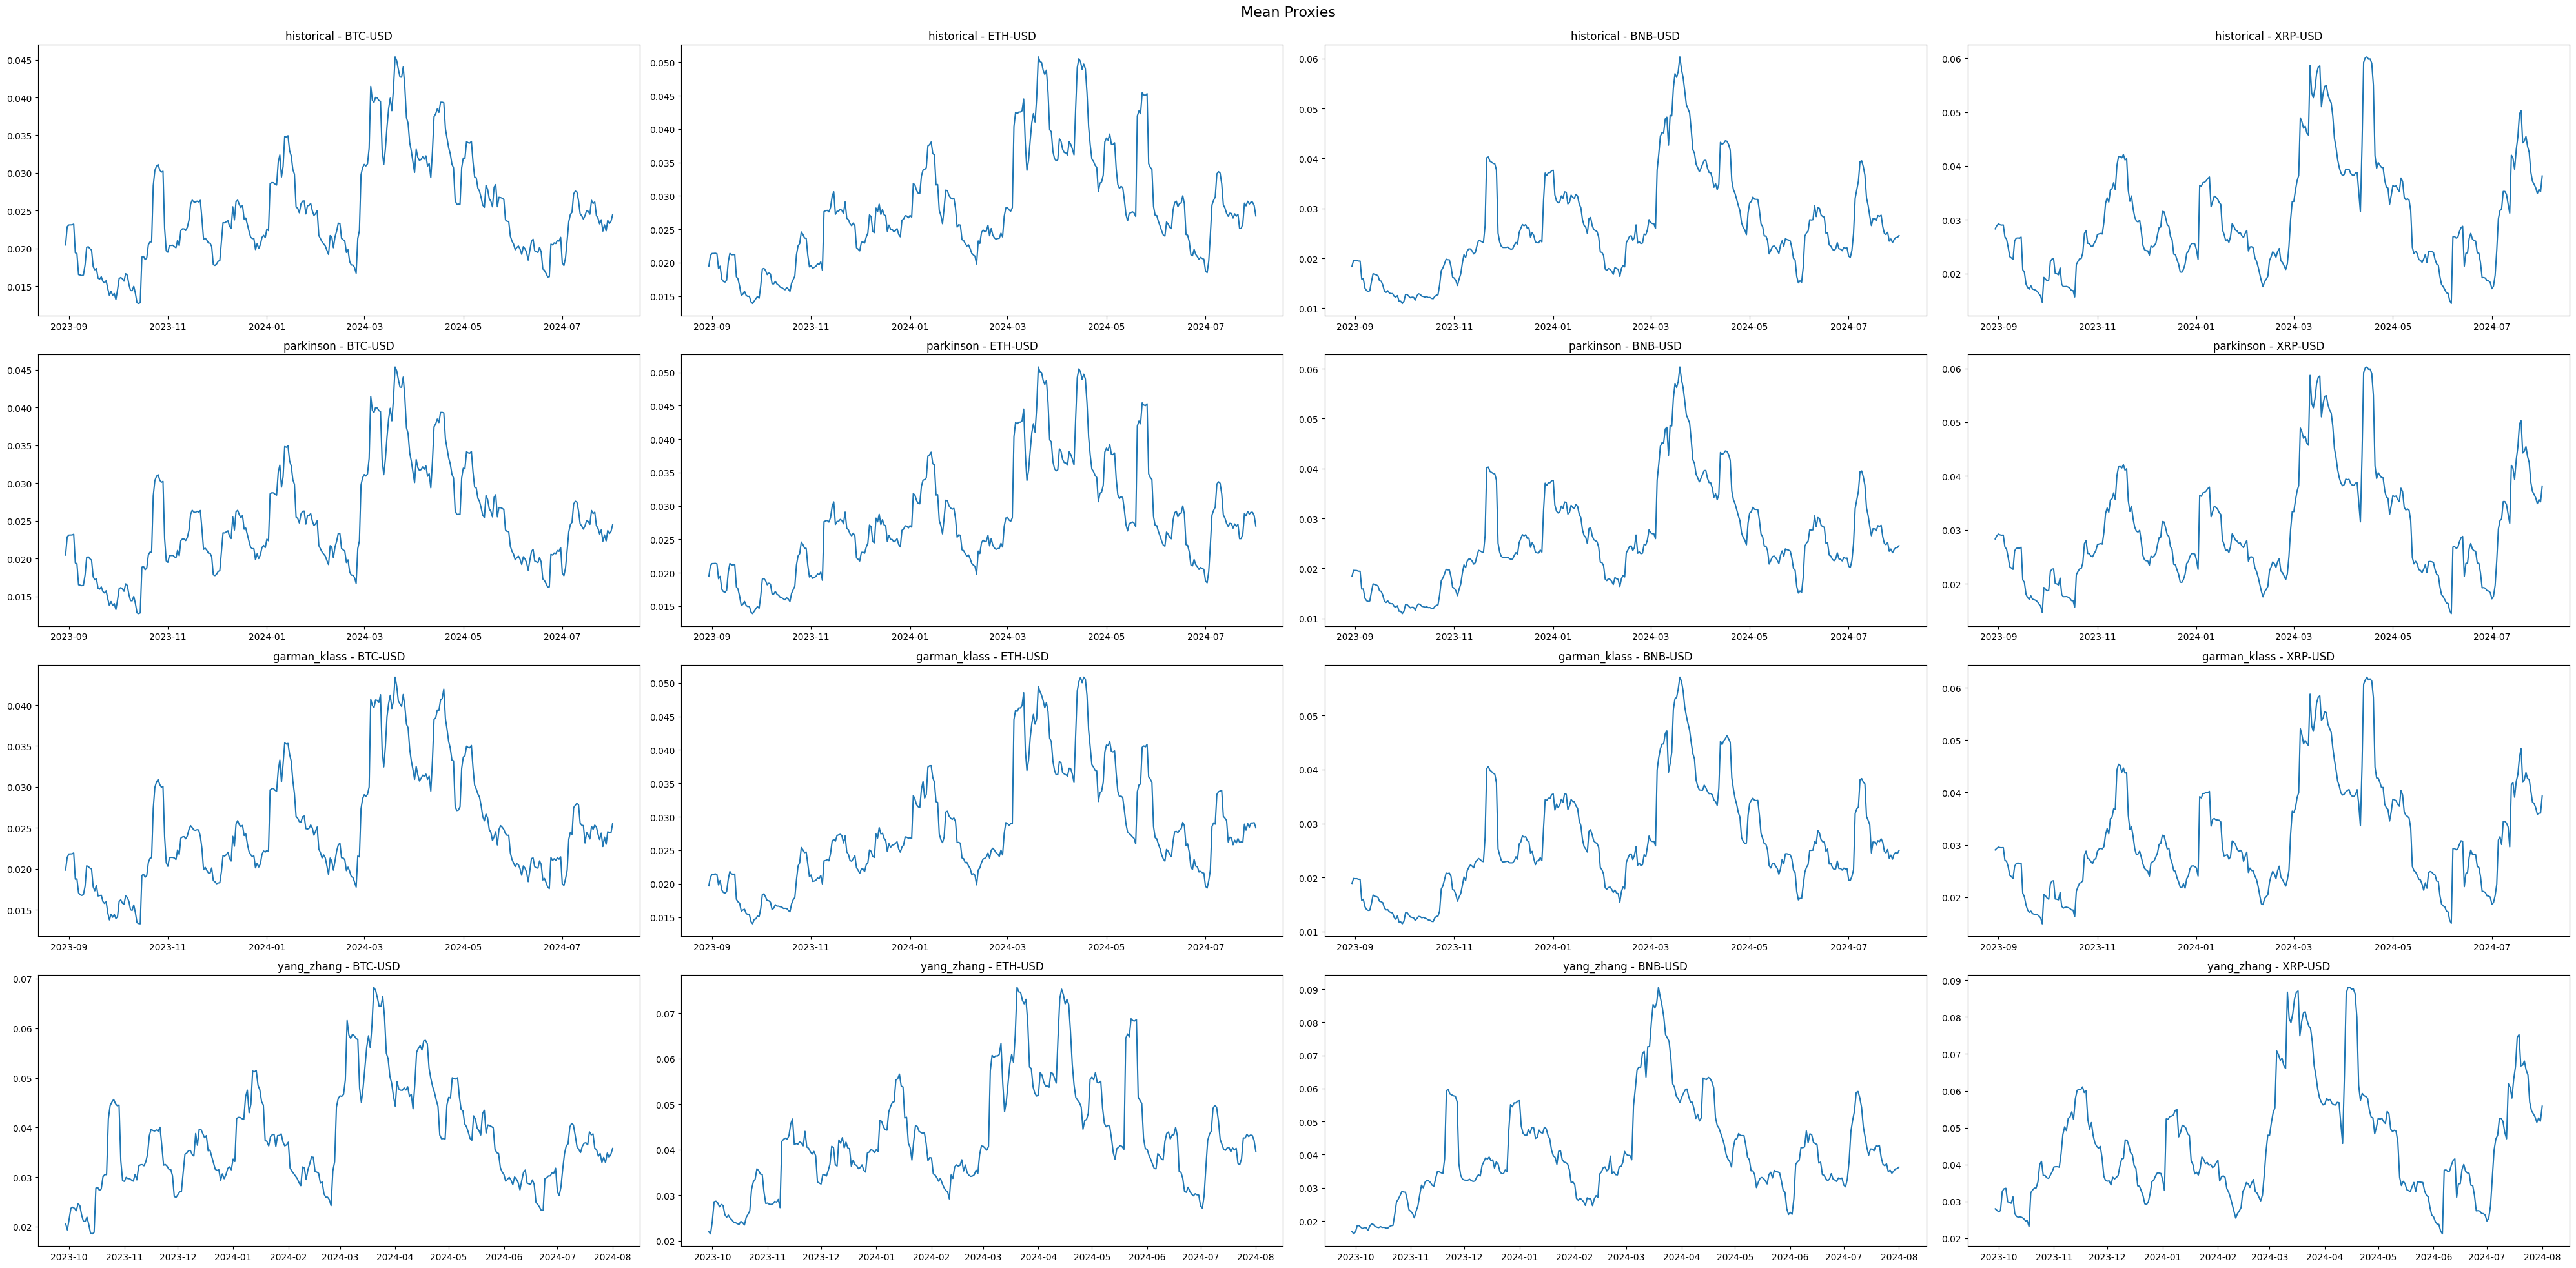

In [29]:

rows = len(mean_proxies)
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 10, rows * 5))
fig.suptitle("Mean Proxies", fontsize=16)

for i, (proxy_name, proxy_data) in enumerate(mean_proxies.items()):
    for j, coin in enumerate(coins):
        ax = axes[i, j] if rows > 1 else axes[j]
        ax.plot(proxy_data[coin])
        ax.set_title(f"{proxy_name} - {coin}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Part 2

### Statistical Models

In [ ]:
from pypfopt import expected_returns, risk_models, black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
market_caps = pd.Series()

for coin in coins:
    stock = yf.Ticker(coin)
    market_cap = stock.info["marketCap"]
    market_caps.loc[coin] = market_cap
print(market_caps)

In [ ]:
cov_matrix = risk_models.sample_cov(data.loc[train_start:train_end].Close)
delta = black_litterman.market_implied_risk_aversion(data.loc[train_start:train_end].Close)
market_prior = black_litterman.market_implied_prior_returns(
    market_caps, delta, cov_matrix
)

print("Initial Market Prior:\n", market_prior)

In [ ]:
weights_dict = {}

for model in mean_volatilities.index:
    bl = BlackLittermanModel(
        cov_matrix,
        absolute_views=mean_volatilities.loc[model],
        pi=market_prior,
    )

    bl_returns = bl.bl_returns()
    ef = EfficientFrontier(bl_returns, cov_matrix)
    ef.add_constraint(lambda w: w >= 0.1)
    ef.add_constraint(lambda w: w <= 0.5)
    weights = ef.max_sharpe()

    bl_weights = pd.DataFrame(
        list(weights.items()), columns=["symbol", "weight"]
    ).set_index("symbol")

    print("\n", model)
    performance = ef.portfolio_performance(verbose=True)
    weights_dict[model] = weights

In [ ]:
# Print optimized weights
pd.DataFrame(weights_dict).T

### Proxies

In [30]:
!pip install PyPortfolioOpt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 13.8 MB/s eta 0:00:00


In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

from pypfopt import expected_returns, risk_models, black_litterman


In [32]:
market_caps = pd.Series()

for coin in coins:
    stock = yf.Ticker(coin)
    market_cap = stock.info["marketCap"]
    market_caps.loc[coin] = market_cap
print(market_caps)

BTC-USD    2085120638976
ETH-USD     402642042880
BNB-USD      97479434240
XRP-USD     180118405120
dtype: int64


In [33]:
train_data = data.loc[train_start:train_end].Close
cov_matrix = risk_models.sample_cov(train_data)
delta = black_litterman.market_implied_risk_aversion(train_data)
market_prior = black_litterman.market_implied_prior_returns(
    market_caps, delta, cov_matrix
)

print("Initial Market Prior:\n", market_prior)

Initial Market Prior:
 Ticker
BNB-USD    0.364479
BTC-USD    0.595630
ETH-USD    0.343118
XRP-USD    0.000935
dtype: float64


In [46]:
weights_from_proxies = {}

for model in mean_proxies.keys():
  print(80 * '=')
  print(f"\n{model} Model:")
  mu = mean_historical_return(mean_proxies[model])
  S = CovarianceShrinkage(mean_proxies[model]).ledoit_wolf()

  num_assets = len(mean_proxies[model].columns)
  random_weights = np.random.random(num_assets)
  random_weights /= random_weights.sum()

  print("\nRandom Weights (Initial Guess):")
  for asset, weight in zip(mean_proxies[model].columns, random_weights):
      print(f"{asset}: {weight:.2%}")

  random_portfolio_return = np.dot(random_weights, mu)
  random_portfolio_volatility = np.sqrt(np.dot(random_weights.T, np.dot(S, random_weights)))
  random_sharpe_ratio = (random_portfolio_return - 0.01) / random_portfolio_volatility

  print(f"\nRandom Portfolio Return: {random_portfolio_return:.2%}")
  print(f"Random Portfolio Volatility: {random_portfolio_volatility:.2%}")
  print(f"Random Portfolio Sharpe Ratio: {random_sharpe_ratio:.2f}")


  market_weights = random_weights.copy()
  market_prior = S @ market_weights

  historical_returns = train_data.pct_change() * 100
  views = historical_returns.mean()
  view_confidences = np.diag(1/ historical_returns.var())

  bl = BlackLittermanModel(S, pi=market_prior, absolute_views=views, omega=view_confidences)
  bl_returns = bl.bl_returns()
  bl_cov_matrix = bl.bl_cov()

  ef = EfficientFrontier(bl_returns, bl_cov_matrix)
  optimized_weights = ef.max_sharpe(risk_free_rate=0.01)
  cleaned_weights = ef.clean_weights()

  performance = ef.portfolio_performance(verbose=True, risk_free_rate=0.01)

  print("\nOptimized Weights (Black-Litterman):")
  for asset, weight in cleaned_weights.items():
      print(f"{asset}: {weight:.2%}")

  weights_from_proxies[model] = cleaned_weights



historical Model:

Random Weights (Initial Guess):
BNB-USD: 6.93%
BTC-USD: 23.25%
ETH-USD: 25.72%
XRP-USD: 44.10%

Random Portfolio Return: 23.16%
Random Portfolio Volatility: 102.70%
Random Portfolio Sharpe Ratio: 0.22
Expected annual return: 49.0%
Annual volatility: 98.8%
Sharpe Ratio: 0.49

Optimized Weights (Black-Litterman):
BNB-USD: 7.93%
BTC-USD: 32.07%
ETH-USD: 27.85%
XRP-USD: 32.16%

parkinson Model:

Random Weights (Initial Guess):
BNB-USD: 51.80%
BTC-USD: 39.49%
ETH-USD: 0.33%
XRP-USD: 8.38%

Random Portfolio Return: 20.28%
Random Portfolio Volatility: 98.01%
Random Portfolio Sharpe Ratio: 0.20
Expected annual return: 60.8%
Annual volatility: 102.2%
Sharpe Ratio: 0.58

Optimized Weights (Black-Litterman):
BNB-USD: 56.41%
BTC-USD: 43.59%
ETH-USD: 0.00%
XRP-USD: 0.00%

garman_klass Model:

Random Weights (Initial Guess):
BNB-USD: 23.84%
BTC-USD: 18.41%
ETH-USD: 37.78%
XRP-USD: 19.97%

Random Portfolio Return: 26.25%
Random Portfolio Volatility: 95.01%
Random Portfolio Sharpe 

In [47]:
weights_df = pd.DataFrame(weights_from_proxies)
weights_df

,historical,parkinson,garman_klass,yang_zhang
BNB-USD,0.07926,0.56405,0.27200,0.30375
BTC-USD,0.32071,0.43595,0.23368,0.21938
ETH-USD,0.27847,0.00000,0.47180,0.41006
XRP-USD,0.32156,0.00000,0.02252,0.06681


# Section 4


### Function for buy-and-hold strategy

In [48]:
def buy_and_hold(symbols, data, initial_capital, weights, trans_fee=0.02):

  opt_investment_amounts = initial_capital * weights
  initial_prices = data.iloc[0]

  opt_shares = (opt_investment_amounts * (1 - trans_fee)) / initial_prices

  final_prices = data.iloc[-1]
  opt_final_portfolio_value = np.sum(opt_shares * final_prices)


  opt_portfolio_values = (data * opt_shares).sum(axis = 1)

  print("Optimal Weights:")
  for w, symbol in zip(weights, symbols):
    print(f"{symbol}: {w:.4f}")
  print(50 * '-')

  print("Shares bought:")
  for i in opt_shares.index:
    print(f"{i}: {opt_shares[i]:.4f}")
  print(50 * '-')

  print("Optimal final portfolio value: ${:.2f}".format(opt_final_portfolio_value))

  return opt_portfolio_values

### Functions for calculating strategy evaluation metrics

In [63]:
def calculate_daily_returns(portfolio_values):
  return portfolio_values.pct_change().dropna()

def calculate_maximum_drawdown(daily_returns):
  cumulative_returns = (daily_returns + 1).cumprod()
  peak = cumulative_returns.cummax()
  drawdown = (cumulative_returns - peak) / peak
  max_drawdown = drawdown.min()

  return max_drawdown

def calculate_sharpe(daily_returns, risk_free = 0.01):
  expected_return = daily_returns.mean() * 252
  std_dev = daily_returns.std()
  annualized_volatility = std_dev * np.sqrt(252)

  sharpe = (expected_return - risk_free) / annualized_volatility
  return sharpe

def calculate_net_profit(portfolio_values):
  return portfolio_values.iloc[-1] - portfolio_values.iloc[0]

In [59]:
def evaluate_strategy(portfolio_values):
  daily_returns = calculate_daily_returns(portfolio_values)
  max_drawdown = calculate_maximum_drawdown(daily_returns)
  sharpe = calculate_sharpe(daily_returns)
  net_profit = calculate_net_profit(portfolio_values)

  print("\nSharpe Ratio:")
  print(sharpe)
  print("\nMaximum Drawdown:")
  print(max_drawdown)
  print("\nNet Profit:")
  print(net_profit)

## Perform Buy-and-Hold strategy on **Train** set (weights obtained from proxies)

In [49]:
portfolio_values_train = {}
initial_capital = 1000

In [50]:
for model in weights_from_proxies.keys():
  print(80 * '=')
  print(f"\n{model} Model:\n")
  portfolio_values_train[model] = buy_and_hold(coins, train_data, initial_capital, weights_df[model])


historical Model:

Optimal Weights:
BTC-USD: 0.0793
ETH-USD: 0.3207
BNB-USD: 0.2785
XRP-USD: 0.3216
--------------------------------------------------
Shares bought:
BNB-USD: 0.3138
BTC-USD: 0.0106
ETH-USD: 0.1458
XRP-USD: 445.5937
--------------------------------------------------
Optimal final portfolio value: $1605.26

parkinson Model:

Optimal Weights:
BTC-USD: 0.5641
ETH-USD: 0.4360
BNB-USD: 0.0000
XRP-USD: 0.0000
--------------------------------------------------
Shares bought:
BNB-USD: 2.2334
BTC-USD: 0.0144
ETH-USD: 0.0000
XRP-USD: 0.0000
--------------------------------------------------
Optimal final portfolio value: $2225.44

garman_klass Model:

Optimal Weights:
BTC-USD: 0.2720
ETH-USD: 0.2337
BNB-USD: 0.4718
XRP-USD: 0.0225
--------------------------------------------------
Shares bought:
BNB-USD: 1.0770
BTC-USD: 0.0077
ETH-USD: 0.2470
XRP-USD: 31.2065
--------------------------------------------------
Optimal final portfolio value: $1933.24

yang_zhang Model:

Optimal We

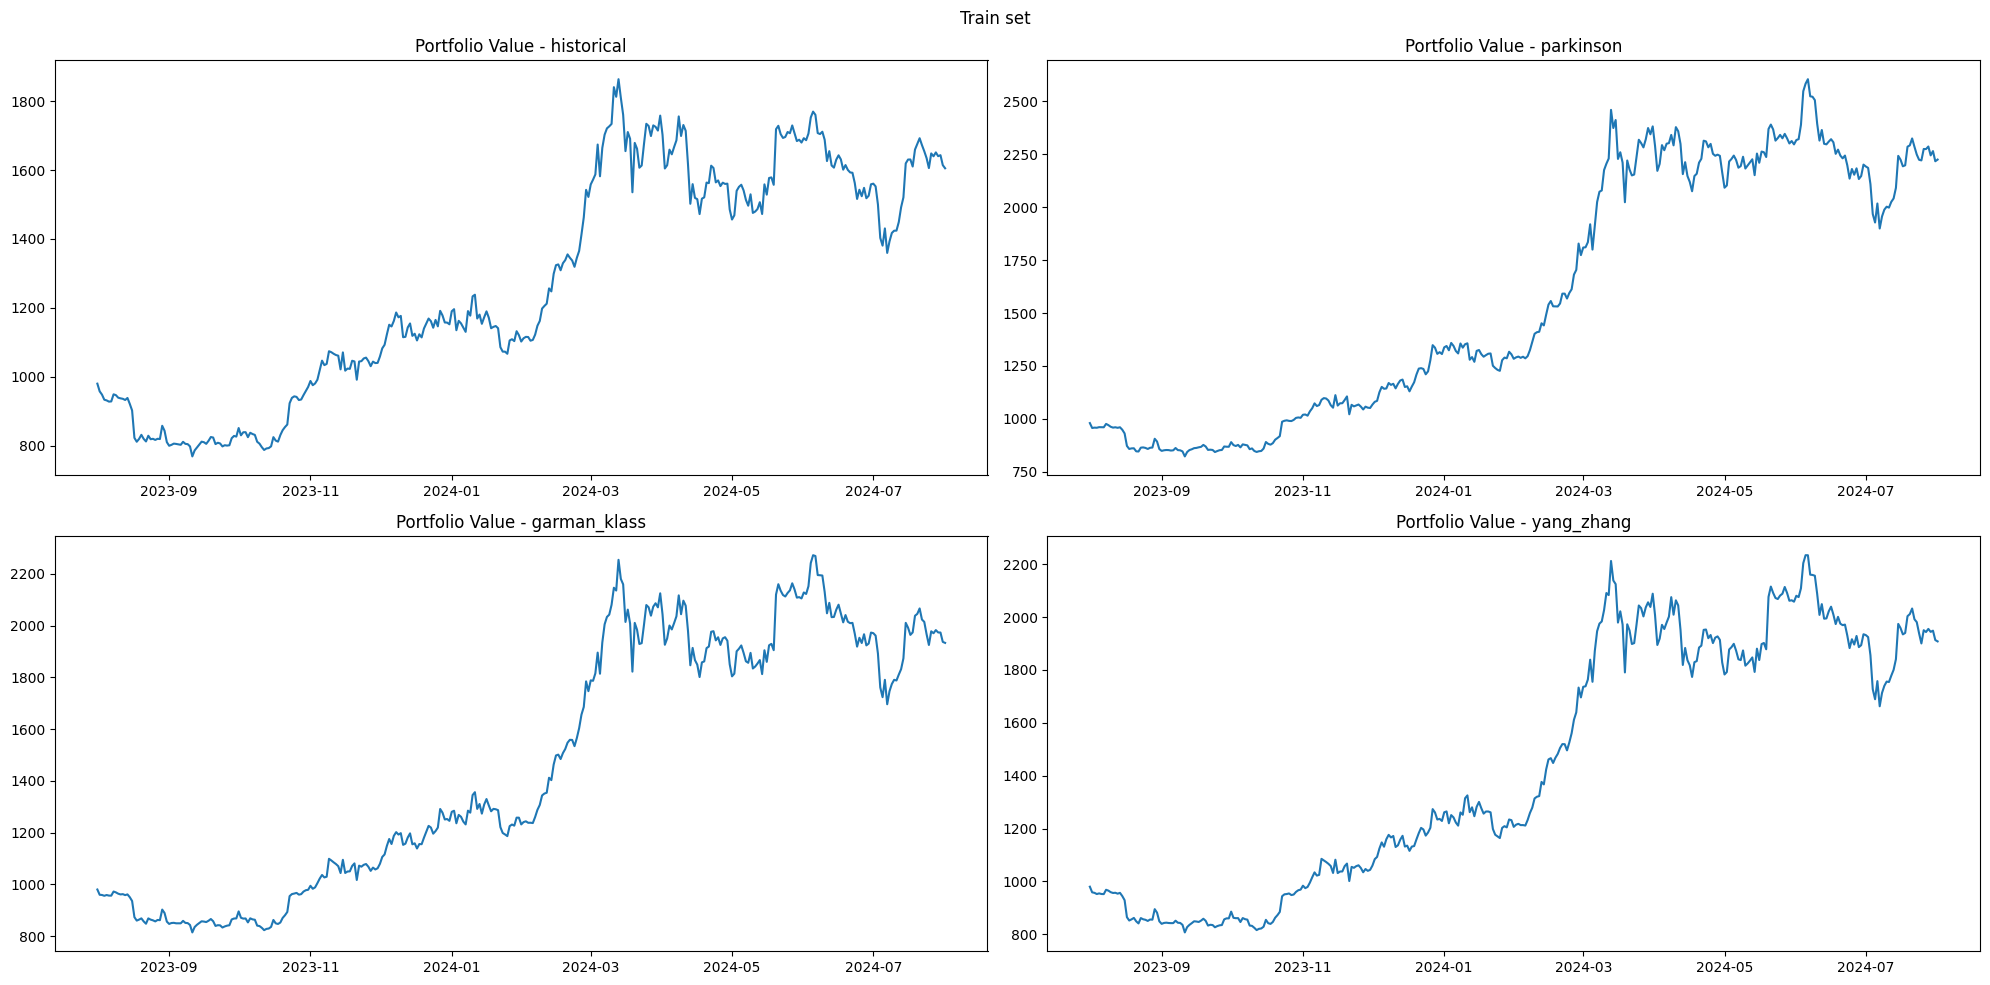

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
model_names = list(portfolio_values_train.keys())
for i, model_name in enumerate(model_names):
    row = i // 2
    col = i % 2
    axes[row, col].plot(portfolio_values_train[model_name])
    axes[row, col].set_title(f"Portfolio Value - {model_name}")

plt.suptitle("Train set")
plt.tight_layout()
plt.show()

## Evaluate the results (for **Train** set)

In [64]:
for model in portfolio_values_train.keys():
  print(80 * "=")
  print(f"\n{model} Model:\n")
  evaluate_strategy(portfolio_values_train[model])


historical Model:


Sharpe Ratio:
1.0555433636760199

Maximum Drawdown:
-0.2705550597172395

Net Profit:
625.257803035659

parkinson Model:


Sharpe Ratio:
1.641367429139625

Maximum Drawdown:
-0.27083582900324926

Net Profit:
1245.4412178290113

garman_klass Model:


Sharpe Ratio:
1.3795089381989856

Maximum Drawdown:
-0.25354614357404737

Net Profit:
953.2410045552983

yang_zhang Model:


Sharpe Ratio:
1.3670665135128923

Maximum Drawdown:
-0.2557813548811402

Net Profit:
927.7985695947878


## Perform Buy-and-Hold strategy on **Test** set (weights obtained from proxies)

In [52]:
portfolio_values_test = {}
initial_capital = 1000

In [53]:
for model in weights_from_proxies.keys():
  print(80 * '=')
  print(f"\n{model} Model:\n")
  portfolio_values_test[model] = buy_and_hold(coins, test_data, initial_capital, weights_df[model])


historical Model:

Optimal Weights:
BTC-USD: 0.0793
ETH-USD: 0.3207
BNB-USD: 0.2785
XRP-USD: 0.3216
--------------------------------------------------
Shares bought:
BNB-USD: 0.1351
BTC-USD: 0.0048
ETH-USD: 0.0852
XRP-USD: 528.3283
--------------------------------------------------
Optimal final portfolio value: $1895.19

parkinson Model:

Optimal Weights:
BTC-USD: 0.5641
ETH-USD: 0.4360
BNB-USD: 0.0000
XRP-USD: 0.0000
--------------------------------------------------
Shares bought:
BNB-USD: 0.9611
BTC-USD: 0.0065
ETH-USD: 0.0000
XRP-USD: 0.0000
--------------------------------------------------
Optimal final portfolio value: $1259.34

garman_klass Model:

Optimal Weights:
BTC-USD: 0.2720
ETH-USD: 0.2337
BNB-USD: 0.4718
XRP-USD: 0.0225
--------------------------------------------------
Shares bought:
BNB-USD: 0.4635
BTC-USD: 0.0035
ETH-USD: 0.1444
XRP-USD: 37.0007
--------------------------------------------------
Optimal final portfolio value: $1248.31

yang_zhang Model:

Optimal We

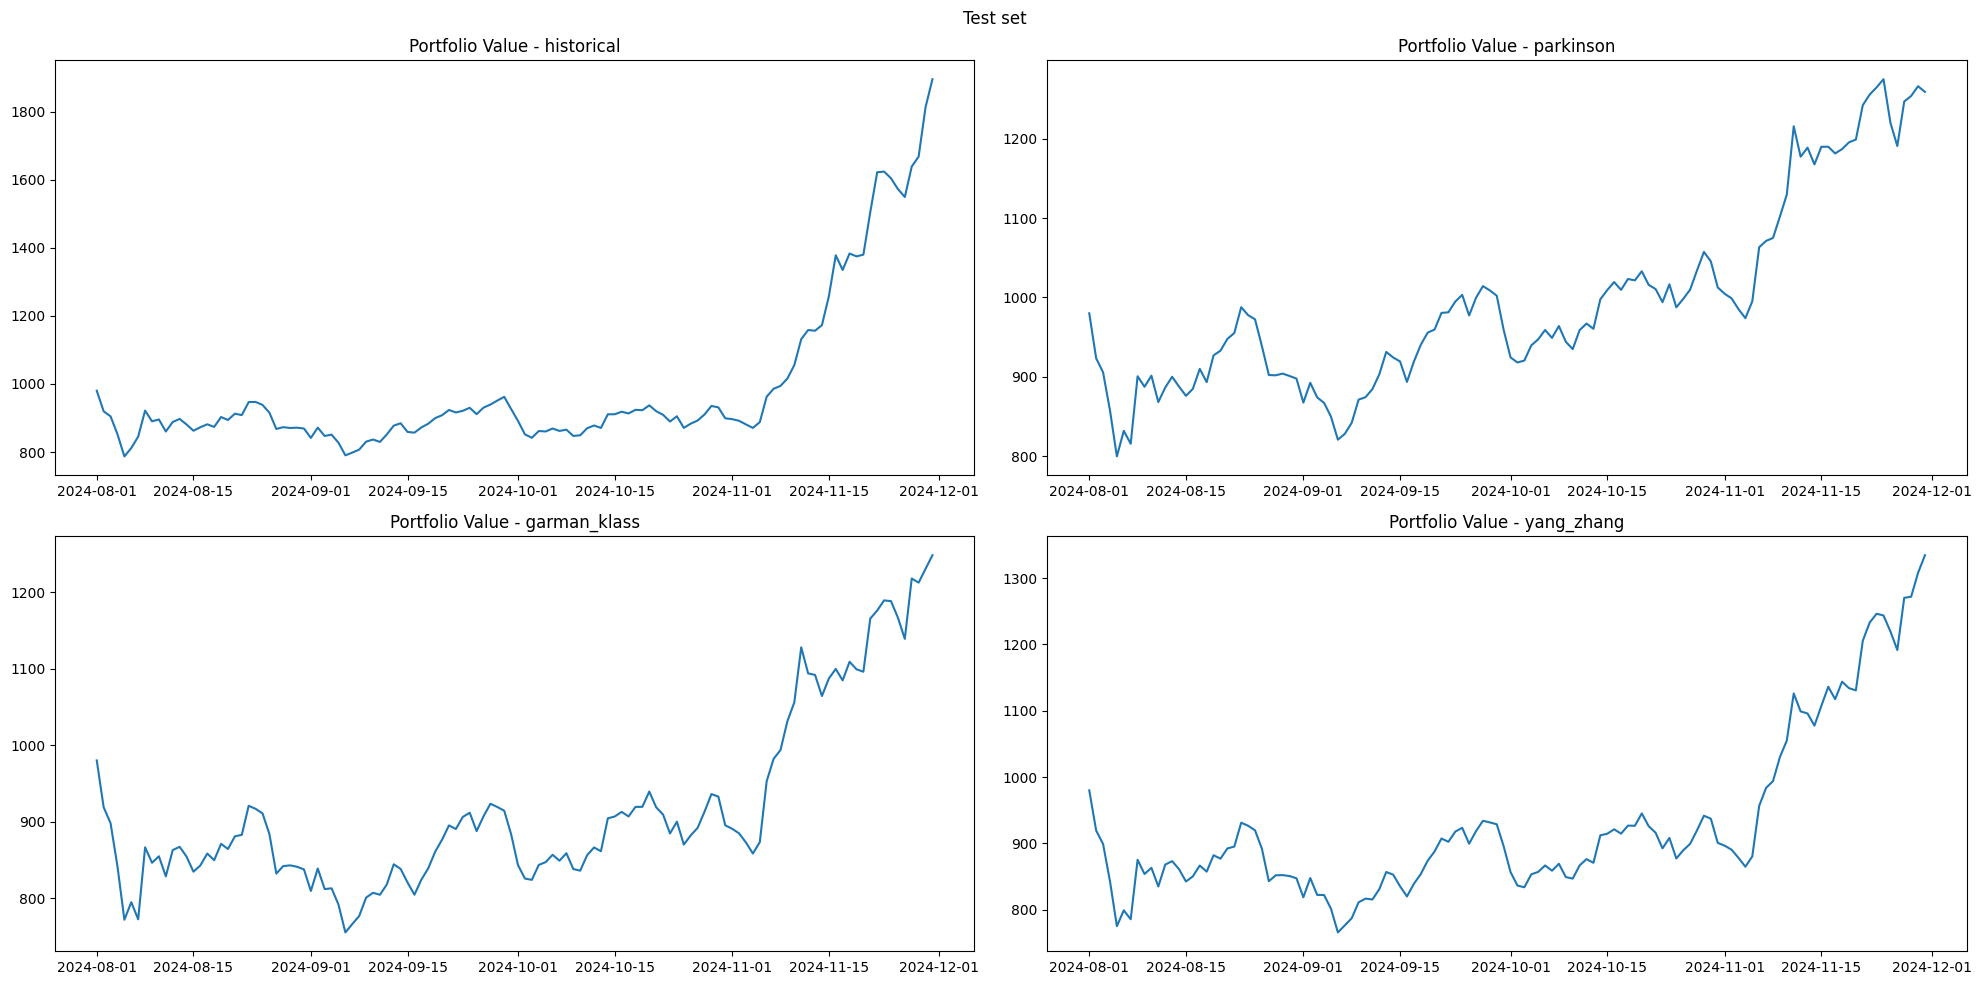

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
model_names = list(portfolio_values_test.keys())
for i, model_name in enumerate(model_names):
    row = i // 2
    col = i % 2
    axes[row, col].plot(portfolio_values_test[model_name])
    axes[row, col].set_title(f"Portfolio Value - {model_name}")

plt.suptitle("Test set")
plt.tight_layout()
plt.show()

## Evaluate the results for **Test** set

In [65]:
for model in portfolio_values_test.keys():
  print(80 * "=")
  print(f"\n{model} Model:\n")
  evaluate_strategy(portfolio_values_test[model])


historical Model:


Sharpe Ratio:
2.9669542824496884

Maximum Drawdown:
-0.16562241002042838

Net Profit:
915.1872344649673

parkinson Model:


Sharpe Ratio:
1.4649162007166463

Maximum Drawdown:
-0.16921398797636644

Net Profit:
279.3418858341943

garman_klass Model:


Sharpe Ratio:
1.2932824138726287

Maximum Drawdown:
-0.17981958022260258

Net Profit:
268.3114318634389

yang_zhang Model:


Sharpe Ratio:
1.622730811518294

Maximum Drawdown:
-0.17760260888816878

Net Profit:
354.4688029894646
